### raw_ML_model_RandomForest

- raw_merged_data 전처리 후 12개의 회귀모델 사용
- target 값의 3 경우로 나누어 실행// Featurescale도 3가지 경우로 나누어 실행
- 결과 적으로 (y=확진자수/ featurescale 방식은 standardscale/ + 분기 column을 dummy화) 조합 결정
- 9가지의 결과 값 비교 후 best_score Top3 model 선택하여 optimization 시행
- optimization은 임의의 param_tuning과 GridSearchcv로 진행

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings

warnings.filterwarnings(action='ignore')

In [7]:

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [180]:
#  merged_data 불러오기

In [91]:
df = pd.read_csv('./data/final_result.csv', index_col=0)
df.head()

,기준_분기_코드,matching_상권_코드_명,상권_구분_코드_명_x,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,...,18시총승객수,19시총승객수,20시총승객수,21시총승객수,22시총승객수,23시총승객수,버스정류장 수,확진자수,선별진료소 수,임시선별소 수
0,2.0,코엑스,발달상권,90544.0,46022.0,44522.0,4560.0,20323.0,26443.0,19121.0,...,124375.0,94556.0,74366.0,62425.0,50758.0,24553.0,10.0,0.0,0.0,1.0
1,1.0,코엑스,발달상권,48906.0,24692.0,24214.0,2970.0,11272.5,13689.5,10139.5,...,46746.0,35292.0,26961.5,22938.5,18948.5,8777.0,10.0,6.0,0.0,1.0
2,2.0,잠실 관광특구,관광특구,3026454.0,1479790.0,1546665.0,255317.0,681334.0,701941.0,495230.0,...,278260.0,217631.0,172048.0,156635.0,147175.0,89409.0,24.0,131.0,1.0,1.0
3,1.0,잠실 관광특구,관광특구,1533259.5,750364.5,782895.0,143798.5,340689.5,343638.5,249110.5,...,98559.0,78759.0,59314.0,54749.0,51631.0,31227.5,24.0,140.0,1.0,1.0
4,2.0,동대문패션타운 관광특구,관광특구,3262023.0,1588974.0,1673049.0,106459.0,612378.0,845244.0,657147.0,...,131072.0,110298.0,90399.0,84175.0,71067.0,59202.0,19.0,114.0,1.0,0.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Columns: 685 entries, 기준_분기_코드 to 임시선별소 수
dtypes: float64(683), object(2)
memory usage: 2.9+ MB


In [93]:
df.isnull().sum().sum()

0

####  target 값의 분포

(array([435.,  62.,  17.,  12.,  10.,   5.,   1.,   5.,   0.,   3.]),
 array([  0. ,  32.7,  65.4,  98.1, 130.8, 163.5, 196.2, 228.9, 261.6,
        294.3, 327. ]),
 <BarContainer object of 10 artists>)

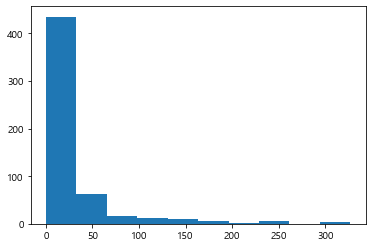

In [94]:
plt.hist(df['확진자수'])

(array([226.,   3.,   0.,  56.,  53.,  96.,  56.,  24.,  26.,  10.]),
 array([0.        , 0.57930136, 1.15860272, 1.73790408, 2.31720544,
        2.8965068 , 3.47580817, 4.05510953, 4.63441089, 5.21371225,
        5.79301361]),
 <BarContainer object of 10 artists>)

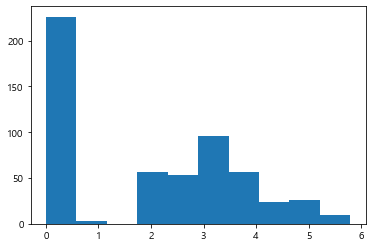

In [95]:
# value가 0일 때 np.log쓰면 inf 값 갖는다. ==> np.logp1써줘야
plt.hist(np.log1p(df['확진자수']))

In [96]:
df.shape

(550, 685)

In [97]:
pd.get_dummies(df).shape

(550, 962)

In [98]:
df = pd.get_dummies(df)

In [99]:
y = df['확진자수']

In [100]:
# y = np.log1p(df['확진자수'])

In [101]:
x = df.drop('확진자수', axis=1)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [105]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [106]:
# scaler = StandardScaler()
# scaler.fit(x_train)

# x_train_stan = scaler.transform(x_train)
# x_test_stan = scaler.transform(x_test)

In [107]:
# scaler = MinMaxScaler()
# scaler.fit(x_train)

# x_train_min = scaler.transform(x_train)
# x_test_min = scaler.transform(x_test)


#### import model

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR

In [110]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [111]:
sv = SVR()
lsv=LinearSVR()
lr = LinearRegression()
ridge = Ridge(random_state=42)
lasso =  Lasso(random_state=42)
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state=42)
etr = ExtraTreesRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
abr = AdaBoostRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42)

### y = np.log1p(df['확진자수'])

In [112]:
df = pd.read_csv('./data/final_result.csv', index_col=0)
df = pd.get_dummies(df)
y = np.log1p(df['확진자수'])
x = df.drop('확진자수', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

#### raw값

In [ ]:
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
0.046837481354253585
-0.10154987215955558

LinearSVR
-1.2601982671528695
-0.9878241272950372

LinearRegression
1.0
-21.978437229066493

Ridge
0.2866485662049618
-1.6908390023124835

Lasso
0.465507301414796
-1.0112975516102738

KNeighborsRegressor
0.22824008944539576
-0.1335217977410923

DecisionTreeRegressor
1.0
-0.7645105461445303

RandomForestRegressor
0.8514726939867492
0.05017356975583498

ExtraTreesRegressor
1.0
0.04657442866831529

GradientBoostingRegressor
0.8760367631029805
-0.05943055273019593

AdaBoostRegressor
0.3253611453835623
0.014226123727263063

XGBRegressor
0.6958240218538481
-0.07721248594698271

LGBMRegressor
0.9909469380269706
-0.10396819548033442



#### StandardScaler

In [113]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
0.30947269254513055
-0.37561961989472414

LinearSVR
0.6211578143567102
-7.480859585120113

LinearRegression
1.0
-25.492525892965773

Ridge
0.8341900285269841
-5.862050250505336

Lasso
0.0
-0.03962675265502158

KNeighborsRegressor
0.164277862780275
-0.1452336021347702

DecisionTreeRegressor
1.0
-0.7645105461445303

RandomForestRegressor
0.8515138443901793
0.049761322235658656

ExtraTreesRegressor
1.0
0.04655870855485178

GradientBoostingRegressor
0.8760367631029805
-0.05943055273019593

AdaBoostRegressor
0.3253611453835623
0.014226123727263063

XGBRegressor
0.9999999162975756
-0.14107492163615287

LGBMRegressor
0.9904275578208057
-0.1008870155402466



#### MinMaxScaler

In [114]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()

SVR
0.17999268225589715
-0.1670131659875449

LinearSVR
0.3482847341859736
-1.0702511501603658

LinearRegression
1.0
-22.001291251765824

Ridge
0.4904125397149842
-0.7501815591812442

Lasso
0.0
-0.03962675265502158

KNeighborsRegressor
0.23372634438436457
-0.23938488292973137

DecisionTreeRegressor
1.0
-0.7753716453344408

RandomForestRegressor
0.8515484046464304
0.04955075770678996

ExtraTreesRegressor
1.0
0.04657442866831529

GradientBoostingRegressor
0.8760367631029805
-0.05943055273019593

AdaBoostRegressor
0.32633593572666086
0.02168018584198872

XGBRegressor
0.9999999162975756
-0.13809106862050835

LGBMRegressor
0.990397349670915
-0.07932623254392213



### y = df['확진자수']

In [116]:
df = pd.read_csv('./data/final_result.csv', index_col=0)
df = pd.get_dummies(df)
y = df['확진자수']
x = df.drop('확진자수', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)


#### raw값

In [117]:
# RandomForestRegressor부터 조금 개선

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
-0.1177650155193759
-0.04685830624904508

LinearSVR
-0.3391107405972069
-0.19827004280249305

LinearRegression
1.0
-19.973374831226593

Ridge
0.5893823454165998
-0.7218079482831872

Lasso
0.7350914127725774
-0.42175506388630524

KNeighborsRegressor
0.3071114734442322
0.03621101107718294

DecisionTreeRegressor
1.0
-0.07658024829660715

RandomForestRegressor
0.869981727977012
0.36484916749206675

ExtraTreesRegressor
1.0
0.1853000019243929

GradientBoostingRegressor
0.9098341034617643
0.2831374984705415

AdaBoostRegressor
0.5843598082696371
0.04367791720100178

XGBRegressor
0.9999999443241604
0.07986878611622494

LGBMRegressor
0.9480753926610712
0.11118095077693413



#### StandardScaler()

In [ ]:
# 조금개선 but 큰 차이 없다.

scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
-0.09161929570490934
-0.02967300533775674

LinearSVR
0.6532817186899869
-0.4301422256034557

LinearRegression
1.0
-4.314460843093612

Ridge
0.9507599600462092
-1.704527833145292

Lasso
0.6992280980253173
0.08922550071395585

KNeighborsRegressor
0.30614572034598164
0.24114808952697642

DecisionTreeRegressor
1.0
-0.07658024829660715

RandomForestRegressor
0.8700360356398275
0.3663546727921888

GradientBoostingRegressor
0.9098341034617643
0.2831374984705415

AdaBoostRegressor
0.5414475740023772
-0.019045138060258093

XGBRegressor
0.9999999443241604
0.07985078952401148

LGBMRegressor
0.941670844835743
0.12617622475490986



#### MinMaxScaler

In [ ]:
# StandardScaler와 유사

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)


models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()
# ridge lasso

SVR
-0.10180570560489222
-0.035921905592223746

LinearSVR
0.1265520102272235
0.220713537660729

LinearRegression
1.0
-3.4805509574027926

Ridge
0.7348622123211772
0.06193703814346674

Lasso
0.19113927952664034
0.2475684213471323

KNeighborsRegressor
0.3387421028676353
0.23890600643534754

DecisionTreeRegressor
1.0
-0.07658024829660715

RandomForestRegressor
0.8700359049163418
0.3649017721829271

GradientBoostingRegressor
0.9098341034617643
0.2831374984705415

AdaBoostRegressor
0.5414475740023772
-0.017956546479337643

XGBRegressor
0.9999999443241604
0.07983290820333011

LGBMRegressor
0.9508040316814171
0.12160961764963141



### 분기를 dummy로


In [25]:
df = pd.read_csv('./data/final_result.csv', index_col=0)
df['기준_분기_코드'] = df['기준_분기_코드'].apply(lambda x : str(x)+'분기')
df = pd.get_dummies(df)
y = df['확진자수']
x = df.drop('확진자수', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

#### raw

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
-0.11776502287928792
-0.046858301266591296

LinearSVR
-0.3391107405972069
-0.19827004280249305

LinearRegression
1.0
-19.968681691026603

Ridge
0.5747360523327052
-0.9127210816320297

Lasso
0.7350915060444312
-0.4217535300946522

KNeighborsRegressor
0.3071114734442322
0.03621101107718294

DecisionTreeRegressor
1.0
-0.13441552247546817

RandomForestRegressor
0.8687337992455182
0.37144211705966057

ExtraTreesRegressor
1.0
0.18584435721392267

GradientBoostingRegressor
0.9098341034617643
0.28883890601728757

AdaBoostRegressor
0.5083718193675437
-0.024529516835490872

XGBRegressor
0.9999999443241604
0.08745775187102756

LGBMRegressor
0.9480753926610712
0.11118095077693413



#### StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
-0.09181792101282338
-0.029720603579305616

LinearSVR
0.6526695974202372
-0.43125466812228863

LinearRegression
1.0
-4.313969361298421

Ridge
0.9507703237992031
-1.705553028679843

Lasso
0.699228453302002
0.08922488415738217

KNeighborsRegressor
0.3073436903194059
0.2455509786675214

DecisionTreeRegressor
1.0
-0.13441552247546817

RandomForestRegressor
0.8687127366413746
0.37234995369256074

ExtraTreesRegressor
1.0
0.18584435721392267

GradientBoostingRegressor
0.9098341034617643
0.28883890601728757

AdaBoostRegressor
0.5460543794577236
0.0013918374030584824

XGBRegressor
0.9999999443241604
0.08743975527881409

LGBMRegressor
0.941670844835743
0.12617622475490986



#### MinMaxscaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)


models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()

SVR
-0.10274184121037755
-0.0349646451184622

LinearSVR
0.12532814610509302
0.21979032012694744

LinearRegression
1.0
-3.4805282078351434

Ridge
0.7348616619979373
0.061913934656117164

Lasso
0.1911393498619013
0.24756832945557627

KNeighborsRegressor
0.32311541507022323
0.26621264376102916

DecisionTreeRegressor
1.0
-0.13441552247546817

RandomForestRegressor
0.8687456796557194
0.3715145607725523

ExtraTreesRegressor
1.0
0.18584435721392267

GradientBoostingRegressor
0.9098341034617643
0.28883890601728757

AdaBoostRegressor
0.5144577620837949
-0.033776274480278756

XGBRegressor
0.9999999443241604
0.08742187395813272

LGBMRegressor
0.9508040316814171
0.12160961764963141



## GridSearchCV
- 위 결과 top3 모델만 선정해서
- RandomForest, extratree, gradientboost
- XGB도 추가로 시행

.

## RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold ,StratifiedKFold

In [27]:
df = pd.read_csv('./data/final_result.csv', index_col=0)
df['기준_분기_코드'] = df['기준_분기_코드'].apply(lambda x : str(x)+'분기')
df = pd.get_dummies(df)
y = df['확진자수']
x = df.drop('확진자수', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [28]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)


### test_param_tuning

In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train_stan,y_train)
print(rfr.score(x_train_stan, y_train))
print(rfr.score(x_test_stan, y_test))

0.8687127366413746
0.37234995369256074


In [ ]:
rfr = RandomForestRegressor(random_state=42,n_estimators=50,min_samples_split=2,max_depth=None)
rfr.fit(x_train_stan,y_train)
print(rfr.score(x_train_stan, y_train))
print(rfr.score(x_test_stan, y_test))

0.8697237399003767
0.39336036005559116


In [ ]:
# rfr = RandomForestRegressor(random_state=42,n_estimators=50,min_samples_split=5,max_depth=None)
# rfr.fit(x_train_stan,y_train)
# print(rfr.score(x_train_stan, y_train))
# print(rfr.score(x_test_stan, y_test))

0.8190835428029833
0.3884278011454798


In [ ]:
rfr = RandomForestRegressor(random_state=42,n_estimators=50,min_samples_split=2,max_depth=10)
rfr.fit(x_train_stan,y_train)
print(rfr.score(x_train_stan, y_train))
print(rfr.score(x_test_stan, y_test))

0.7691724250904901
0.42003138551471086


In [ ]:
rfr = RandomForestRegressor(random_state=42,n_estimators=40,min_samples_split=2,max_depth=10)
rfr.fit(x_train_stan,y_train)
print(rfr.score(x_train_stan, y_train))
print(rfr.score(x_test_stan, y_test))

0.7662339280551964
0.4284552627460819


In [ ]:
# rfr = RandomForestRegressor(random_state=42,n_estimators=50,min_samples_split=2,max_depth=13)
# rfr.fit(x_train_stan,y_train)
# print(rfr.score(x_train_stan, y_train))
# print(rfr.score(x_test_stan, y_test))

0.8006148773821854
0.4064891939721752


In [29]:
rfr = RandomForestRegressor(random_state=42,n_estimators=35,min_samples_split=2,max_depth=10)
rfr.fit(x_train_stan,y_train)
print(rfr.score(x_train_stan, y_train))
print(rfr.score(x_test_stan, y_test))

0.7663297648592939
0.4288248735428668


### Gridsearch  - param 고정 , KFold 차이보기

#### KFold = 5

In [ ]:
cv = KFold(5, shuffle=True, random_state=42)
params = { 
    'n_estimators': [100,200,300,400],
    'max_depth' : [None, 2, 4,6,8],
    'min_samples_split': [2, 3]}

In [ ]:
grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=params,cv=cv, refit=True, verbose=True, n_jobs=-1) 

In [ ]:
grid.fit(x_train_stan,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=True)

In [ ]:
grid.best_estimator_ 

RandomForestRegressor(max_depth=2, n_estimators=400, random_state=42)

In [ ]:
grid.best_score_ 

0.0631160214034538

In [ ]:
grid.score(x_test_stan,y_test)

0.2702142360339329

#### KFold = 3

In [ ]:
cv = KFold(3, shuffle=True, random_state=42)
params = { 
    'n_estimators': [100,200,300,400],
    'max_depth' : [None, 2, 4,6,8],
    'min_samples_split': [2, 4,6]}

In [ ]:
grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=params,cv=cv, refit=True, verbose=True, n_jobs=-1) 

In [ ]:
grid.fit(x_train_stan,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=True)

In [ ]:
grid.best_estimator_ 

RandomForestRegressor(max_depth=2, min_samples_split=6, n_estimators=400,
                      random_state=42)

In [ ]:
grid.best_score_ 

0.03591297075892711

In [ ]:
grid.score(x_train_stan,y_train)

0.4116534251966041

In [ ]:
grid.score(x_test_stan,y_test)

0.2685873617279849

#### KFold = 7

In [ ]:
cv = KFold(7, shuffle=True, random_state=42)
params = { 
    'n_estimators': [100,200,300,400],
    'max_depth' : [None, 2, 4,6,8],
    'min_samples_split': [2, 4,6]}

In [ ]:
grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=params,cv=cv, refit=True, verbose=True, n_jobs=-1) 

In [ ]:
grid.fit(x_train_stan,y_train)

Fitting 7 folds for each of 60 candidates, totalling 420 fits


GridSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=True)

In [ ]:
grid.best_estimator_ 

RandomForestRegressor(max_depth=2, min_samples_split=6, n_estimators=400,
                      random_state=42)

In [ ]:
grid.best_score_ 

0.07403671822896381

In [ ]:
grid.score(x_train_stan,y_train)

0.4116534251966041

In [ ]:
grid.score(x_test_stan,y_test)

0.2685873617279849

### Gridsearch  -  KFold = 5고정, param_tuning

In [ ]:
cv = KFold(5, shuffle=True, random_state=42)
params = { 
    'n_estimators': [20,40,60,80,100],
    'max_depth' : [None, 4,8,10,20,30],
    'min_samples_split': [2,4, 5]}

In [ ]:
grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=params,cv=cv, refit=True, verbose=True, n_jobs=-1) 

In [ ]:
grid.fit(x_train_stan,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8, 10, 20, 30],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [20, 40, 60, 80, 100]},
             verbose=True)

In [ ]:
grid.best_estimator_ 

RandomForestRegressor(max_depth=4, random_state=42)

In [ ]:
grid.best_score_ 

0.030092949474665544

In [ ]:
grid.score(x_train_stan,y_train)

0.5856201033549269

In [ ]:
grid.score(x_test_stan,y_test)

0.3339663920622944

In [ ]:
cv = KFold(5, shuffle=True, random_state=42)
params = { 
    'n_estimators': [35,40,45,50,55,65],
    'max_depth' : [None,8,10,12,14,16],
    'min_samples_split': [2,4,6]}

In [ ]:
grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=params,cv=cv, refit=True, verbose=True, n_jobs=-1) 

In [ ]:
grid.fit(x_train_stan,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 8, 10, 12, 14, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [35, 40, 45, 50, 55, 65]},
             verbose=True)

In [ ]:
grid.best_estimator_ 

RandomForestRegressor(max_depth=8, min_samples_split=6, n_estimators=50,
                      random_state=42)

In [ ]:
grid.best_score_ 

0.0005408480737325138

In [ ]:
grid.score(x_train_stan,y_train)

0.6903664375779386

In [ ]:
grid.score(x_test_stan,y_test)

0.3583314295331921

### best_score_model의 feature_importance >0 인 column으로 구성된 DataFrame만들기
 - various_trial for optimization에 쓰일 df

In [133]:
rfr_model = RandomForestRegressor(random_state=42,n_estimators=35,min_samples_split=2,max_depth=10)
rfr_model.fit(x_train_stan,y_train)


feature_list = pd.concat([pd.Series(x.columns), pd.Series(rfr_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)[:27]

,features_name,importance
488,matching_상권_코드_명_용산구청,0.059039
472,matching_상권_코드_명_공항대로59다길,0.036254
477,matching_상권_코드_명_디지털미디어시티,0.036039
490,matching_상권_코드_명_학동로56길,0.023843
474,matching_상권_코드_명_구로중앙로28길,0.022609
482,matching_상권_코드_명_서울 관악구 서울대입구역_1,0.022103
246,여성연령대_30_금요일시간대_5_생활인구_수,0.020652
67,남성연령대_20_토요일시간대_3_생활인구_수,0.020353
483,matching_상권_코드_명_서울 마포구 홍대입구역_3,0.018284
439,연령대_30_매출_건수,0.018129


In [121]:
rfr_list =feature_list[feature_list.importance.sort_values() >0 ].features_name.tolist()
rfr_list.append('확진자수')
df = pd.read_csv('./data/final_result.csv', index_col=0)
df['기준_분기_코드'] = df['기준_분기_코드'].apply(lambda x : str(x)+'분기')
df = pd.get_dummies(df)
rfr_df = df[rfr_list]
rfr_df.head()

,총_생활인구_수,여성_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,...,matching_상권_코드_명_오금로46길,matching_상권_코드_명_오패산로4길,matching_상권_코드_명_용산 전자상가_1,matching_상권_코드_명_용산구청,matching_상권_코드_명_풍납시장,matching_상권_코드_명_학동로56길,matching_상권_코드_명_홍익대학교 주변,상권_구분_코드_명_x_골목상권,상권_구분_코드_명_x_전통시장,확진자수
0,90544.0,44522.0,20323.0,26443.0,19121.0,10720.0,9376.0,5320.0,18099.0,20800.0,...,0,0,0,0,0,0,0,0,0,0.0
1,48906.0,24214.0,11272.5,13689.5,10139.5,5693.5,5141.5,2790.0,9265.0,11210.0,...,0,0,0,0,0,0,0,0,0,6.0
2,3026454.0,1546665.0,681334.0,701941.0,495230.0,391058.0,501575.0,578627.0,572865.0,438326.0,...,0,0,0,0,0,0,0,0,0,131.0
3,1533259.5,782895.0,340689.5,343638.5,249110.5,199107.5,256914.5,290635.5,287121.0,223978.5,...,0,0,0,0,0,0,0,0,0,140.0
4,3262023.0,1673049.0,612378.0,845244.0,657147.0,488176.0,552620.0,760989.0,660302.0,466658.0,...,0,0,0,0,0,0,0,0,0,114.0


In [122]:
rfr_df.to_csv('rfr_df.csv')

### best_score_model의 feature_importance 상위 20개로 DataFrame만들기
- 결론에 쓰일 상관분석을 위해

<AxesSubplot:title={'center':'Correlation of Features'}>

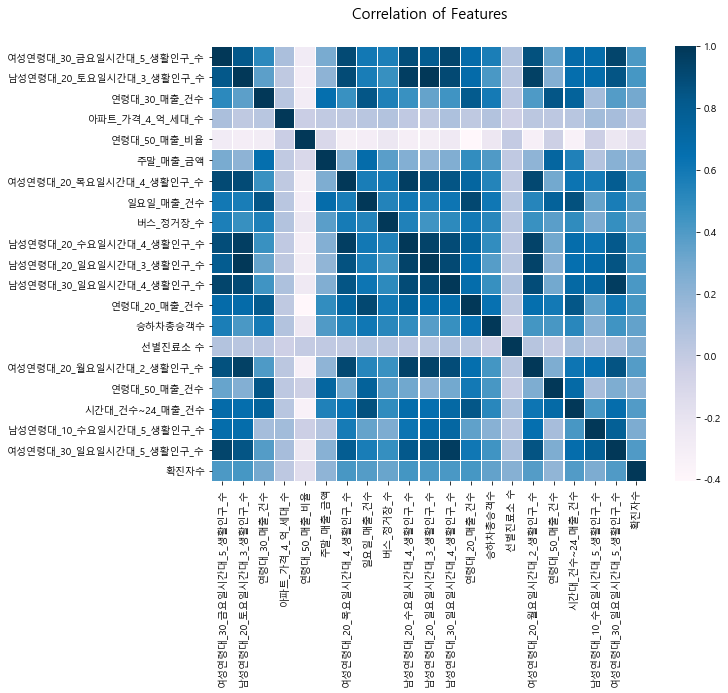

In [176]:
rfr_model = RandomForestRegressor(random_state=42,n_estimators=35,min_samples_split=2,max_depth=10)
rfr_model.fit(x_train_stan,y_train)

feature_list = pd.concat([pd.Series(x.columns), pd.Series(rfr_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
result_index =feature_list.sort_values("importance", ascending =False)[:27].features_name.tolist()
result_index.append('확진자수')

df = pd.read_csv('./data/final_result.csv', index_col=0)
df['기준_분기_코드'] = df['기준_분기_코드'].apply(lambda x : str(x)+'분기')
df = pd.get_dummies(df)

result_df = df[result_index]
result_columns = result_df.columns[~result_df.columns.str.contains('mat')]
result_df =result_df[result_columns]
result_df = pd.read_csv('./data/result_df.csv')
result_df .drop('Unnamed: 0', axis=1, inplace=True)
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(result_df .astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot_kws = {"size" : 16})

In [179]:
result_df

,여성연령대_30_금요일시간대_5_생활인구_수,남성연령대_20_토요일시간대_3_생활인구_수,연령대_30_매출_건수,아파트_가격_4_억_세대_수,연령대_50_매출_비율,주말_매출_금액,여성연령대_20_목요일시간대_4_생활인구_수,일요일_매출_건수,버스_정거장_수,남성연령대_20_수요일시간대_4_생활인구_수,...,남성연령대_30_일요일시간대_4_생활인구_수,연령대_20_매출_건수,승하차총승객수,선별진료소 수,여성연령대_20_월요일시간대_2_생활인구_수,연령대_50_매출_건수,시간대_건수~24_매출_건수,남성연령대_10_수요일시간대_5_생활인구_수,여성연령대_30_일요일시간대_5_생활인구_수,확진자수
0,445.0,180.0,36621.235290,0.0,14.029412,1.485212e+09,512.0,14811.088240,14.0,280.0,...,236.0,32472.264710,9457337.0,0.0,387.0,12713.235290,3972.264706,74.0,231.0,0.0
1,238.0,96.5,18070.060605,0.0,13.454545,6.577505e+08,291.0,7238.636365,14.0,153.5,...,131.5,17030.272725,3067976.0,0.0,198.5,6289.318180,2546.606060,50.5,137.5,6.0
2,10026.0,5577.0,38274.069770,70.0,15.372093,1.187771e+09,7518.0,20760.627910,31.0,5907.0,...,6825.0,49550.930230,14499529.0,1.0,9512.0,15785.953490,18868.813950,3715.0,9403.0,131.0
3,4774.5,2672.0,17237.300000,70.0,17.444444,4.746946e+08,3769.0,9516.888890,31.0,3047.5,...,3372.5,23435.388890,4719596.0,1.0,4671.5,7014.077780,8607.688890,2081.0,4524.5,140.0
4,9342.0,4009.0,54575.978260,0.0,16.456522,1.611771e+09,6217.0,19042.304350,21.0,5262.0,...,5253.0,55262.760870,4515825.0,1.0,8872.0,25944.978260,24331.934780,1032.0,7094.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,582.5,395.0,4654.500000,14.0,8.437500,2.484750e+08,416.5,3331.031250,2.0,358.0,...,468.5,8530.281250,649084.0,0.0,375.5,794.625000,4768.687500,134.5,527.0,0.0
546,2837.0,1301.0,2920.500000,20.0,22.000000,4.350391e+07,1656.0,1341.416667,2.0,1116.0,...,1753.0,2384.750000,1391054.0,0.0,3521.0,2826.041667,811.166667,2145.0,2938.0,42.0
547,1357.5,644.0,1362.250000,20.0,19.833333,2.072612e+07,786.5,639.062500,2.0,585.5,...,916.5,1149.000000,441558.5,0.0,1690.5,1223.000000,368.416667,876.5,1428.5,0.0
548,162.0,114.0,1668.304348,0.0,34.565217,9.659461e+07,183.0,470.521739,2.0,169.0,...,100.0,1140.739130,7297798.0,0.0,123.0,2576.782609,407.652174,30.0,77.0,40.0


## XGBRegressor

In [ ]:
df = pd.read_csv('./data/final_result.csv', index_col=0)
df['기준_분기_코드'] = df['기준_분기_코드'].apply(lambda x : str(x)+'분기')
df = pd.get_dummies(df)
y = df['확진자수']
x = df.drop('확진자수', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)

### 임의 실행

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train_stan,y_train)
print(xgb.score(x_train_stan, y_train))
print(xgb.score(x_test_stan, y_test))

0.9999999443241604
0.08743975527881409


In [ ]:
xgb = XGBRegressor(random_state=42, learning_rate = 0.05)
xgb.fit(x_train_stan,y_train)
print(xgb.score(x_train_stan, y_train))
print(xgb.score(x_test_stan, y_test))

0.9828303631392956
0.23327082045360514


In [ ]:
xgb = XGBRegressor(random_state=42, learning_rate = 0.05, colsample_bytree =0.9,subsample =0.6)
xgb.fit(x_train_stan,y_train)
print(xgb.score(x_train_stan, y_train))
print(xgb.score(x_test_stan, y_test))

0.9262913666369094
0.24949249162649179


In [ ]:
xgb = XGBRegressor(random_state=42, learning_rate = 0.05, colsample_bytree =0.9,subsample =0.2)
xgb.fit(x_train_stan,y_train)
print(xgb.score(x_train_stan, y_train))
print(xgb.score(x_test_stan, y_test))

0.6982836038771671
0.2780064072359304


### GridSearchCV

In [ ]:
cv = KFold(5, shuffle=True, random_state=42)
params = { 
    'learning_rate': np.arange(0.01,0.25,0.01),
    'subsample' : np.arange(0.1,1,0.1),
    'colsample_bytree': np.arange(0.1,1,0.1)}
grid_x=GridSearchCV(XGBRegressor(random_state=42),param_grid=params,cv=cv, refit=True, verbose=True, n_jobs=-1) 

In [ ]:
grid_x.fit(x_train_stan,y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monot...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'learning_rate': array([0.01, 0.02, 0.03, 0.04,

In [ ]:
grid_x.best_estimator_ 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7000000000000001, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
grid_x.best_score_ 

0.10354497816081827

In [ ]:
grid_x.score(x_train_stan,y_train)

0.32496927138225595

In [ ]:
grid_x.score(x_test_stan,y_test)

0.205114507421012